Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes ci-dessous par vos réponses: 
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 


---

# TD 7 : Traitement d'images

## Exercice 1a : Lecture d'image png

On souhaite étudier les composantes rouge (R), verte (G) et bleue (B) d’une image de Saturne. Importer l’image couleur "saturne.png". Afficher l'image en utilisant par exemple la librarie matplotlib.image.

<function matplotlib.pyplot.show(*args, **kw)>

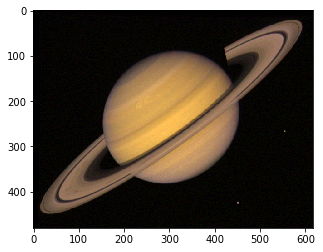

In [4]:
import numpy as np
import matplotlib.image as mimg
import matplotlib.pyplot as plt

img= mimg.imread("data/saturne.png")
fig = plt.figure
plt.imshow(img)
plt.show

Decomposer l'image en composantes RGB et afficher les images.

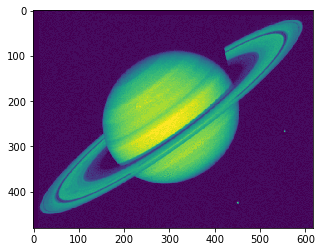

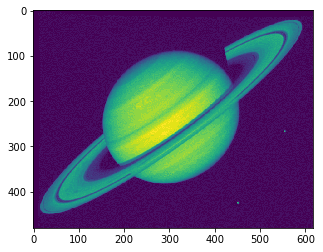

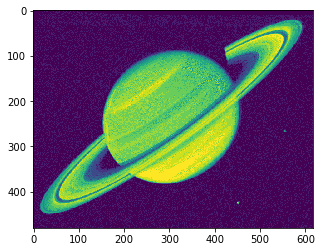

In [11]:
fig1 = plt.figure
im1=plt.imshow(img[:,:,0])
plt.show(fig1)

fig2 = plt.figure
plt.imshow(img[:,:,1])
plt.show(fig2)

fig3 = plt.figure
plt.imshow(img[:,:,2])
plt.show(fig3)

Quelles conclusions tirez vous sur la contribution de chaque couleur? Quelles sont les valeur min et max de chaque couleur?

In [20]:
color=["rouge","vert","bleu"]

for c in 0,1,2 :
    print("Le max est du ", color[c]," est ",np.max(img[:,:,c]))
    print("Le min est du ", color[c]," est ",np.min(img[:,:,c]))
    


Le max est du  rouge  est  1.0
Le min est du  rouge  est  0.0
Le max est du  vert  est  0.77254903
Le min est du  vert  est  0.0
Le max est du  bleu  est  0.41568628
Le min est du  bleu  est  0.0


## Exercice 1b : Optionnel - si vous avez du temps

Afficher l'image de "The Hulk" (voir image Hulk.png). Notre super-héro a honte de lui... Faite le rougir....

## Exercice 2 : Utilisation de PIL et Manipulation d'images

Exercice pour se familiariser avec la librairie PIL et module Image.

Importer le fichier Planck.jpg avec PIL. Retrouver la taille de l'image, son mode, afficher l'image et extraire la valeur du pixel (50, 50).

mode : RGB
taille : (500, 546)


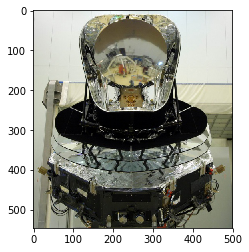

pixel(50,50) : (226, 228, 225)


In [49]:
from PIL import Image

im = Image.open('data/Planck.jpg')
plk=im.copy()
im.close()
print("mode :",plk.mode)
print("taille :",plk.size)

fig = plt.figure
im=plt.imshow(plk)
plt.show(im)

print("pixel(50,50) :", plk.getpixel((50,50)))

Créer une nouvelle image (sans nécessairement l'enregistrer) formant l'inverse de l'image originale avec un code que vous écrirez. Chaque pixel de couleur $x$ se verra assigné la valeur $255-x$. Afficher la nouvelle image.

Faite la même chose à partir des fonctions du module ImageChops de PIL.

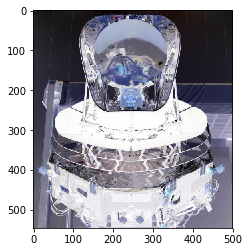

In [50]:
passa =np.ones_like(plk)*255
new= passa-plk

fig = plt.figure
im=plt.imshow(new)
plt.show(im)


Créer une nouvelle image donnant une rotation de 90deg par rapport à l'image originale avec un code que vous écrirez. Afficher la nouvelle image.

Faire la même chose à partir des modules de PIL.

## Exercice 3 : Comprendre la convolution

A l'aide des fonctions zeros et ones de numpy, fabriquer un signal discret de longueur 90 contenant des créneaux de période 30 chacun (donc trois créneaux).

In [77]:
cren=np.concatenate((np.zeros(15),np.ones(15), np.zeros(15),np.zeros(15),np.ones(15), np.zeros(15)))

Fabriquer  une fonction de convolution porte normalisée de longueur variable (vous pouvez commencer par 11 points par exemple).

In [78]:
def porte(N) :
    L=np.ones(N+1)/N
    return L
    
    

A l'aide de la fonction convolve de numpy effectuer la convolution du signal avec la fonction porte.

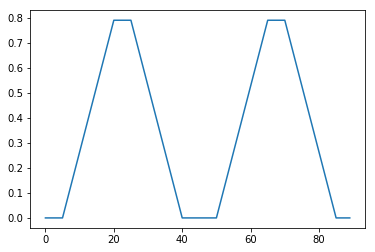

In [88]:
N=19
co=np.convolve(cren,porte(N),'same')
x=np.arange(len(cren))
xn=np.arange(N+1)

fig = plt.figure
plt.plot(x,co)
plt.show()


Sur un même graphique, représentez le signal, la fonction de convolution et le résultat de la convolution.

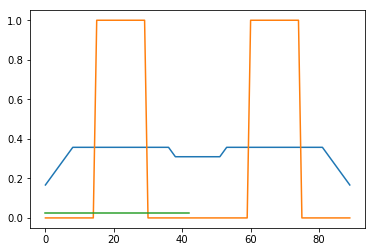

In [95]:
N=42
co=np.convolve(cren,porte(N),'same')
x=np.arange(len(cren))
xn=np.arange(N+1)

fig = plt.figure
plt.plot(x,co)
plt.plot(x,cren)
plt.plot(xn,porte(N))
plt.show()

Comparez les résultats avec les modes 'full' et 'same'. Vous pourrez garder le mode 'same' dans la suite de cet exercice.

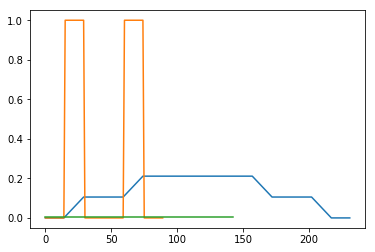

In [94]:
N=142
co=np.convolve(cren,porte(N),'full')
x=np.arange(len(cren)+N)
xc=np.arange(len(cren))
xn=np.arange(N+1)

fig = plt.figure
plt.plot(x,co)
plt.plot(xc,cren)
plt.plot(xn,porte(N))
plt.show()

## Exercice 4 : Filtrage de signaux réels

Des mesures réelles d’une radiosource ont été réalisées à l’aide du radiotélescope Rameau situé sur le toit du batiment 333 de l’université. On souhaite estimer le flux supposé constant. Les mesures sont enregistrées dans le fichier signal1.txt. La première colonne donne l’instant de la mesure en millisecondes et la deuxième la tension, proportionnelle au flux, mesurée en volt.

Représenter graphiquement V(t), la tension (signal V) en volt en fonction du temps en secondes (t).

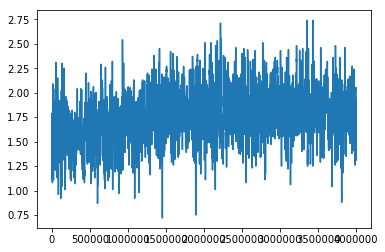

In [118]:
data=np.loadtxt('data/signal1.txt')
tab=data.copy()
t=tab[:,0]
v=tab[:,1]


fig=plt.figure()
plt.plot(t,v)
plt.show()

Effectuer un lissage par moyenne glissante (mis en oeuvre par convolution avec une porte normalisée) sur 50 et 500 valeurs. Pour mieux comparer les signaux, on imposera à tous les graphes une même échelle en ordonnée.

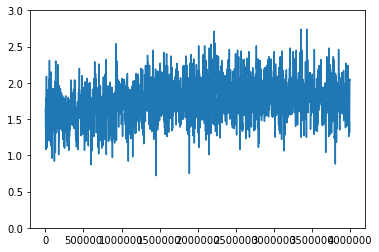

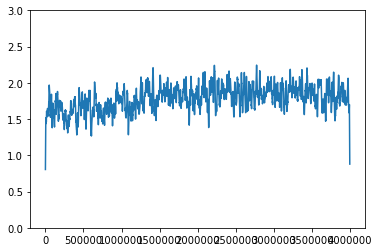

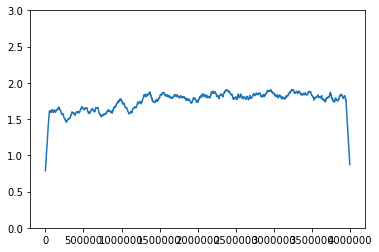

In [143]:


lis1=np.convolve(v,porte(50),'same')
lis2=np.convolve(v,porte(500),'same')


fig0 = plt.figure
plt.plot(t,v)
plt.ylim(0,3)
plt.show(fig0)

fig1 = plt.figure
plt.plot(t,lis1)
plt.ylim(0,3)
plt.show(fig1)

fig2 = plt.figure
plt.plot(t,lis2)
plt.ylim(0,3)
plt.show(fig2)



Qu’observez vous et quelles conclusions en tirez vous ?

YOUR ANSWER HERE

En utilisant la fonction medfilt de scipy, comparer les effets de filtrage par une moyenne et une médiane de fenêtre de même taille (essayer de faire cela pour plusieurs tailles de fenêtre).

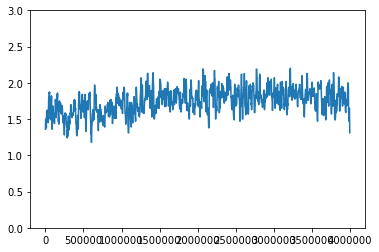

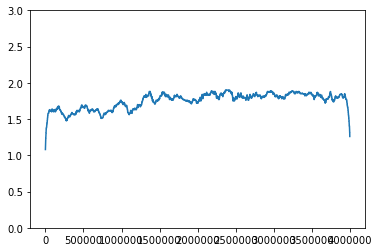

In [153]:
import scipy.signal as scp

for n in [51,501]:
    fmed=scp.medfilt(v,n)

    fig3 = plt.figure
    plt.plot(t,fmed)
    plt.ylim(0,3)
    plt.show(fig3)


## Exercice 5 : Convolution sur image

Importer l'image Ujack.png. Afficher l'image est ses composantes.

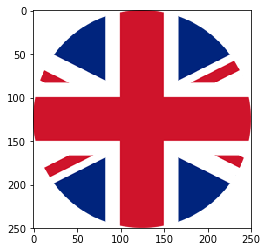

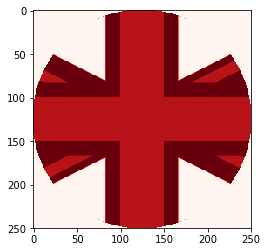

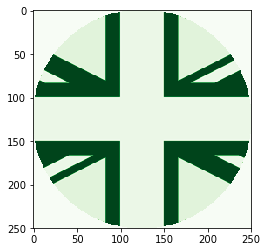

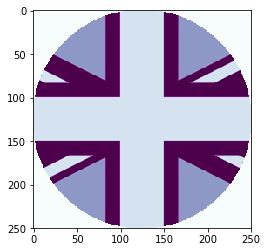

In [168]:
jack=mimg.imread("data/Ujack.png")

fig = plt.figure
plt.imshow(jack)
plt.show(fig)

figr = plt.figure
im1=plt.imshow(jack[:,:,0],cmap='Reds')
plt.show(figr)

figv = plt.figure
plt.imshow(jack[:,:,1],cmap='Greens')
plt.show(figv)

figb = plt.figure
plt.imshow(jack[:,:,2],cmap='BuPu')
plt.show(figb)

On utilise seulement la composante Bleue. A l'aide de la fonction convolve2d de scipy, réaliser deux convolutions différentes sur l’image, avec comme fenêtre de convolution des portes 2D normalisées de côté 10, et 50 respectivement.

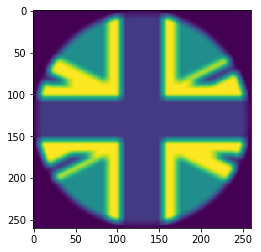

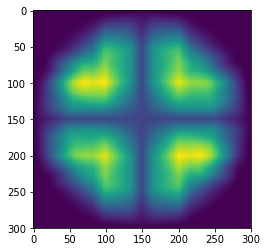

In [178]:
import scipy.signal as scp

jackB=jack[:,:,2]

def porte2D(N) :
    S=np.ones((N+1,N+1))/N**2
    return S

for N in [10,50]:
    conv1 = scp.convolve2d(jackB,porte2D(N))

    figN = plt.figure
    plt.imshow(conv1)
    plt.show(figN)

Quelles conclusions en tirez vous?

YOUR ANSWER HERE

Effectuer deux convolutions séparées de la composante bleue respectivement avec un vecteur colonne [0.5, -0.5] 
et un vecteur ligne [0.5, -0.5]

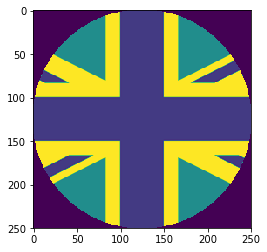

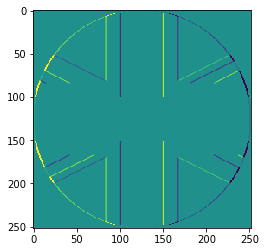

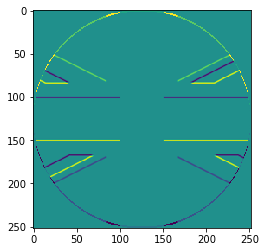

In [189]:
vectL=np.zeros((3,3))
vectL[1][0]=0.5
vectL[1][2]=-0.5
convL = scp.convolve2d(jackB,vectL)

vectC=np.zeros((3,3))
vectC[0][1]=0.5
vectC[2][1]=-0.5
convC = scp.convolve2d(jackB,vectC)

figB = plt.figure
plt.imshow(jackB)
plt.show(figB)

figL = plt.figure
plt.imshow(convL)
plt.show(figL)

figC = plt.figure
plt.imshow(convC)
plt.show(figC)

Affichez les images. Quels filtres avez vous réalisés?

YOUR ANSWER HERE

## Exercice 6 : Débruitage d'images

L'image dans le fichier bateau.png est bruitée. Afin de réduire le bruit nous allons appliquer plusieurs types de filtres. Importer et afficher l'image et ses composantes. Créer une image en additionnant les 3 composantes RGB sans oublier de la normaliser à 1 afin de créer une matrice 2D.

Appliquer 3 filtres differents:
- Une convolution avec une moyenne glissante de fenêtre normalisée de taille 3x3
- Un filtre médiane de largeur 3x3: vous pouvez par exemple utiliser le filtre medfilt2d de scipy.
- Un filtre Gaussien avec sigma = 2: vous pouvez par exemple utiliser le filtre gaussian_filter de scipy

Afficher les résultats (vous pourrez aussi changer les tailles des filtres) et tirer les conclusions.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

## Pour aller plus loin - Exercice 7 : Obtenir des informations à partir d'une image

Le fichier andromeda.png contient l'image de la galaxie Andromède qui se situe à environ 780 kpc de nous. Le champ de vue de chaque pixel est 0,001 deg. Nous voulons estimer la surface de cette galaxie.

Importer l'image et créer une matrice 2D en additionnant les composantes.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Nous allons essayer d'estimer la fraction de la surface de la galaxie par rapport a la surface de l'image. Il existe plusieurs facons d'effectuer cela. Vous pourrez par exemple commencer par effectuer une convolution par moyenne ou mediane afin de faire ressortir (séparer) plus nettement la galaxie du fond. Puis utiliser un seuil (libre a vous de fixer le niveau) afin de séparer la galaxie du fond et ainsi effectuer le rapport des surfaces.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

A partir du champ de vue de l'image, calculer sa surface correspondante a la distance d'Andromede et estimer la surace de la galaxie en $kpc^2$

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()